In [1]:
#importing python libraries
import pandas as pd 
import numpy as np
import pandas_profiling
% matplotlib inline
import matplotlib.pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r"F:\DataSets\UpGrade\bank-additional\bank-additional-full.csv", 
                   sep=";")

In [3]:
df = data.drop('y', axis=1)

In [4]:
y = data['y'].map({'yes': 1, 'no': 0})

In [5]:
#Dummy Variables
data = pd.get_dummies(df)


In [6]:
#Merging 'feature variables' and ' Target Variables'
data = data.merge(pd.DataFrame(y), left_index=True, right_index=True)

In [7]:
pandas_profiling.ProfileReport(data)

Number of variables,64
Number of observations,41188
Total Missing (%),0.0%
Total size in memory,5.5 MiB
Average record size in memory,141.0 B
Numeric,8
Categorical,0
Boolean,53
Date,0
Text (Unique),0
Rejected,3


In [8]:
#Drop Duplicate rows
data.drop_duplicates(keep=False, 
                     inplace=True)

In [9]:
#Drop Highly correlated variables

data = data.drop(['euribor3m','nr.employed','housing_unknown'], axis=1)

In [10]:
#replacing feature - 'pdays' value from 999 to 0, as 999 means client was not previously contacted, means 999 = contacted 0 times

data.pdays.replace(999,0, inplace=True)

In [11]:
# Generating X and Y variables
y = data['y']
X = data.drop(['y'], axis = 1)

In [12]:
#Splitting data into Train and Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Feature Scaling

In [13]:
#Scaling

scaler = StandardScaler()

scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Logistic Regression

In [14]:
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
logreg = linear_model.LogisticRegression(penalty = 'l1' ,C=0.5)

In [15]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_pred = logreg.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import accuracy_score

In [18]:
cnf = confusion_matrix(y_pred,y_test)
cnf

array([[7126,  495],
       [ 216,  396]], dtype=int64)

In [19]:
accuracy_score(y_pred,y_test)

0.9136402283493259

# RandomForest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
ranfor = RandomForestClassifier(n_estimators = 100, max_depth=10, random_state=13,criterion='gini')

In [22]:
ranfor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [23]:
y_pred = ranfor.predict(X_test)

In [24]:
accuracy_score(y_pred,y_test)

0.9085388072391595

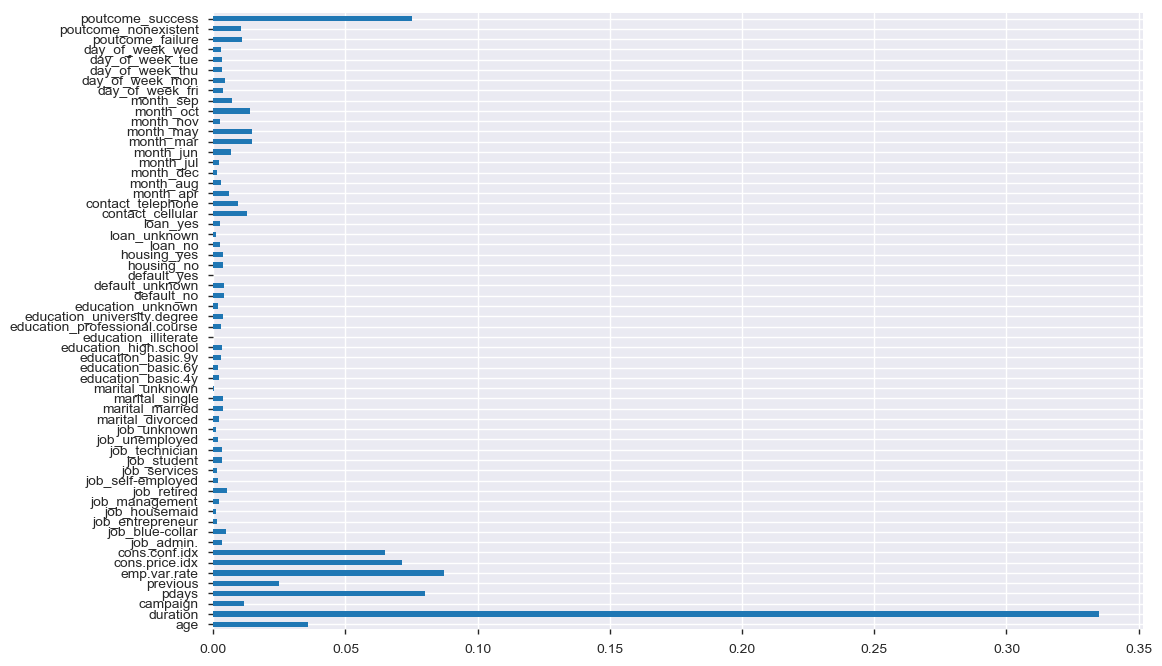

In [25]:
#Showing important features 
importances=pd.Series(ranfor.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(5)

In [27]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
y_pred = model.predict(X_test)

In [29]:
accuracy_score(y_pred,y_test)

0.8989432770557513